# Kredi Kartı Müşteri Segmentasyonu 
Bu yazımda Credit Card Dataset for Clustering verisetindeki verileri kullanarak kredi kartı müşterilerini segmentlere ayırmaya çalışacağız. Bunun için;

* Verisetini inceleyip, görselleştirmeye çalışacağız. 
* Verilerin birbirleri ile ilişkilerini anlamak için korelasyonlara bakacağız. 
* KMeans kümeleme algoritması kullanarak müşterileri segmentlere ayıracağız. 
* En son olarak PCA kullanarak özellik boyutumuzu küçülteceğiz ve müşteri segmentlerimizi bir grafik üzerinde inceleyebileceğiz. 

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

## Datanın İncelenmesi 
Veri setinde bulunan sutunlarda yazan bilgileri açıklamalarını aşağıdaki gibi görebilirsiniz.

In [2]:
# CUSTID : Identification of Credit Card holder (Categorical)
# BALANCE : Balance amount left in their account to make purchases (
# BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES : Amount of purchases made from account
# ONEOFFPURCHASES : Maximum purchase amount done in one-go
# INSTALLMENTSPURCHASES : Amount of purchase done in installment
# CASHADVANCE : Cash in advance given by the user
# PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
# CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
# PURCHASESTRX : Numbe of purchase transactions made
# CREDITLIMIT : Limit of Credit Card for user
# PAYMENTS : Amount of Payment done by user
# MINIMUM_PAYMENTS : Minimum amount of payments made by user
# PRCFULLPAYMENT : Percent of full payment paid by user
# TENURE : Tenure of credit card service for user

data = pd.read_csv("dataset/CC GENERAL.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Veri setindeki sutunları genel olarak incelemek istersek describe metodunu kullanabiliriz. Bu metod ile ortalama, standart sapma, min ve maksimum bilgilerine erişebiliriz. 

In [3]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Info metoduyla da verilerin veri tipleri görüp bunlara göre işlemler yapabiliriz. 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

CUST_ID sutunu segmentasyon yaparken bizim için bir anlam ifade etmeyeceği için drop metodu ile düşürüyoruz.

In [5]:
data.drop(["CUST_ID"],axis=1,inplace=True)

In [6]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Eksik veri var mo? Kontrol etmek için isnull() metodunu kullanıyoruz. Bu bize her veri için null değer varsa True null değer yoksa False döndürür. Bunu heatmap ile göstermek için sns.heatmap() kullanırız. 

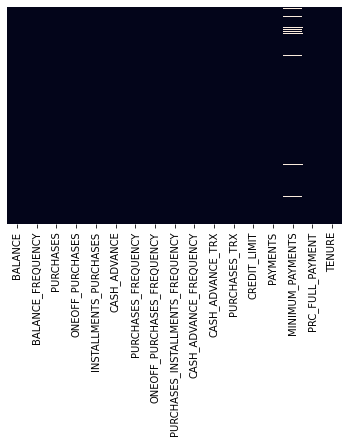

In [7]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

Hangi sutunda ne kadar Null değer var öğrenmek için .sum() metodunu kullanırız. Aşağıda görüldüğü gibi MINIMUM_PAYMENTS sutununda 313 , CREDIT_LIMIT sutununda 1 Null değer bulunuyor. 

In [8]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Null olan bu değerleri ortalama değer ile dolduruyoruz. 

In [9]:
data.loc[data["MINIMUM_PAYMENTS"].isnull()==True,"MINIMUM_PAYMENTS"] = data["MINIMUM_PAYMENTS"].mean()
data.loc[data["CREDIT_LIMIT"].isnull()==True,"CREDIT_LIMIT"] = data["CREDIT_LIMIT"].mean()
data.isnull().sum().sum()

0

# Veri Görselleştirme
Segmentasyon için kullanacağımız verileri daha iyi anlamak için görselleştirmeler yapabiliriz. Bunun için bir çok yol olsada ortalama değerleri görmek ve outlierları tespit etmek için en anlaşılır grafik tiplerinden biri histogram grafikleridir. 

## Histogram Grafik
Histogram grafikler bir değer aralığı içersinde bulunan verilerin sayılarını göstererek sayısal verileri görselleştirmemize olanak sağlar. Veri hakkında genel bir fikrimiz olmasına olanak sağlar. Aşağıda da görebileceğiniz gibi bir grafikte verilerin sayısı çubuklar ile gösteririlir. Çubuk ne kadar büyükse o aralıkta bulunan veri sayısı o kadar fazladır. 

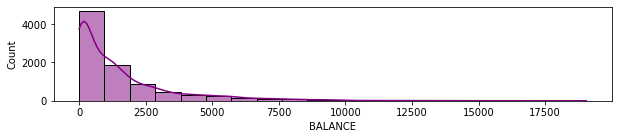

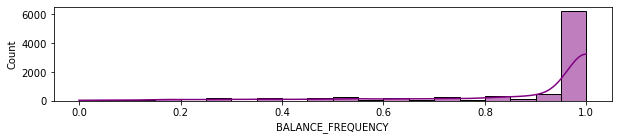

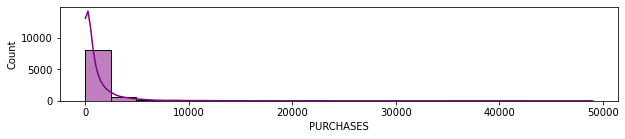

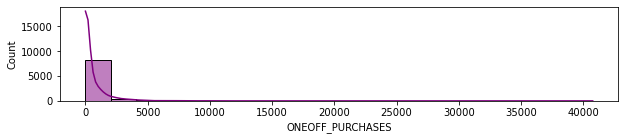

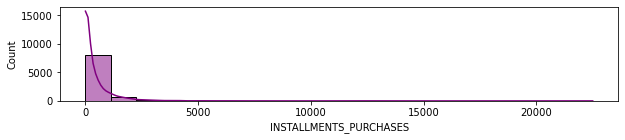

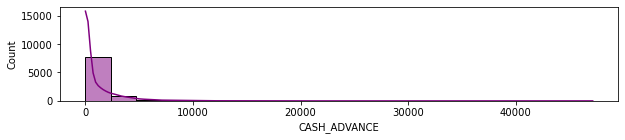

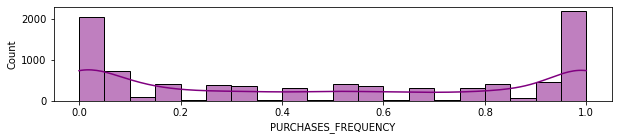

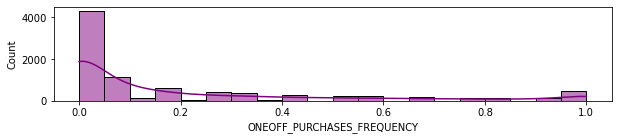

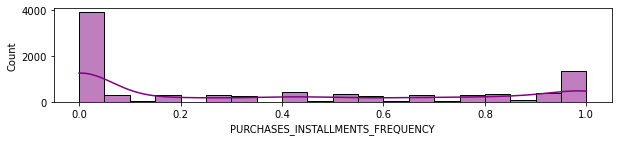

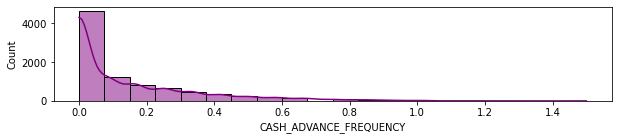

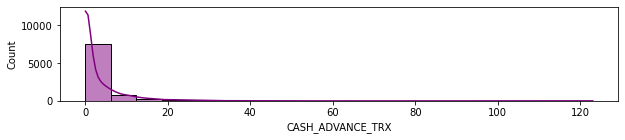

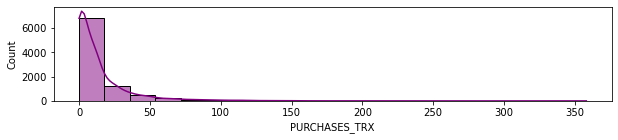

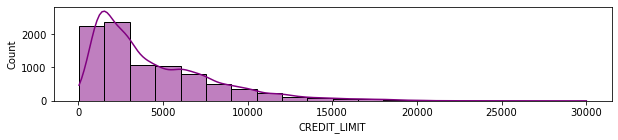

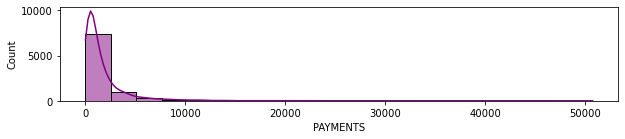

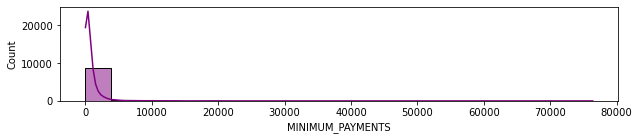

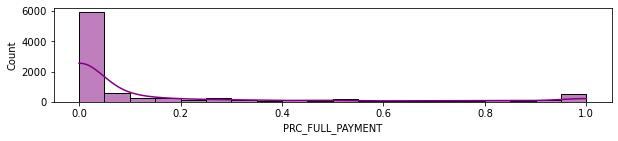

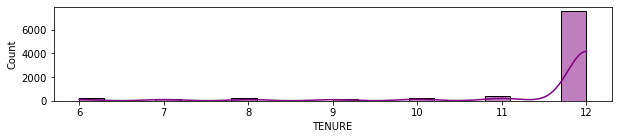

In [10]:
for i in range(len(data.columns)):
    plt.figure(figsize=(10,35))
    plt.subplot(17,1,i+1)
    sns.histplot(data[data.columns[i]],bins=20,color="purple",kde=True)
    plt.xlabel(data.columns[i])

## Korelasyon 
Korelasyon değişkenler arasındaki ilişkiyi ve bu ilişkinin yönünü tespit etmemize olanak sağlar. 1 ile -1 arasında değer alır. Değer 0 dan büyükse pozitif korelasyon değer 0 dan küçükse negatif korelasyon vardır. Pozitif korelasyon 2 değişkenden biri artarken diğeride onunla aynı yönde artmasıdır. Negatif korelasyon bir değişken artarken diğer değişkenin onunla terse yönde azalması olarak en genel hali ile özetleyebiliriz. Bunu dataframe üzerinde görmek için .corr() metodunu kullanırız. Heatmap ilede bunların şiddetlerini bir heatmap üzerinde daha net görebiliriz. 

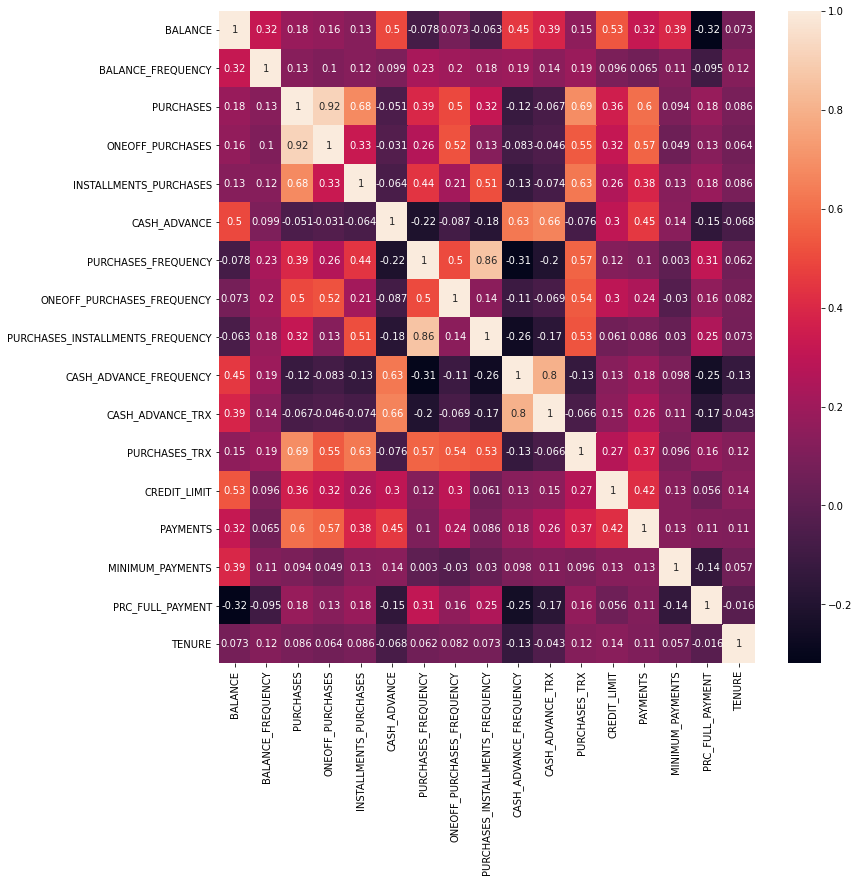

In [12]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True)

## Datayı Scale Edelim 
Tüm makine öğrenimi algoritmaları benzer scalede olan ve normal dağılım gösteren veri ile daha iyi sonuçlar verir. Bu sebeple bizde belirli metodalar kullanarak veriyi uygun bir scale getirmeye çalışırız. Bu örnekte sklearn'de bulunan StandardScaler'ı kullanacağız. Standardization veriden ortalamayı çıkartıp standart sapmaya bölünerek yapılır. Veriyi -1 ile 1 arasına scale etmiş oluruz.  

In [13]:
# Preprocessing 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

Kümeleme - Clustering
Clustering veri setinde bulunan benzer özelliklere sahip verilerin gruplanmasıyla yapılır. Bu işlem unsupervised olarak gerçekleşir. En genel algoritmalaranda biri KMeans algoritmasıdır. En temel anlamda KMeans;

Öncelikle kaç küme aradığımızı yazarız
Veri setinde belirttiğimiz küme sayısı kadar rastgele centroidler belirlenir
Bu belirlenen centroidlere yakınlığına göre veriler bu centroidlerin etiketleri ile etiketlenir.
Centroidlerin konumu, kendi etiketlerini alan verilerin ortalaması olacak çekilde güncellenir.
Tekrar 3. adıma gidilir ve veriler etiketlenir centroid konumu güncellenir bu işlem algoritma durana kadar devam eder.
KMeans algoritmasında en genel problemlerden biri cluster sayısını belirlenmesidir. Bunun için Elbow Metodunu kullanırız. Elbow metoduna göre belirli bir aralıkta cluster sayısı ile hata hesaplayıp bunu grafikte gösteririz. Elbow - Dirsek kısmı bizim için cluster sayısını belirlememize yardımcı olur.## Kümeleme - Clustering
Clustering veri setinde bulunan benzer özelliklere sahip verilerin gruplanmasıyla yapılır. Bu işlem unsupervised olarak gerçekleşir. En genel algoritmalaranda biri KMeans algoritmasıdır. En temel anlamda KMeans; 
1. Öncelikle kaç küme aradığımızı yazarız
2. Veri setinde belirttiğimiz küme sayısı kadar rastgele centroidler belirlenir
3. Bu belirlenen centroidlere yakınlığına göre veriler bu centroidlerin etiketleri ile etiketlenir. 
4. Centroidlerin konumu, kendi etiketlerini alan verilerin ortalaması olacak çekilde güncellenir. 
5. Tekrar 3. adıma gidilir ve veriler etiketlenir centroid konumu güncellenir bu işlem algoritma durana kadar devam eder. 

KMeans algoritmasında en genel problemlerden biri cluster sayısını belirlenmesidir. Bunun için Elbow Metodunu kullanırız. Elbow metoduna göre belirli bir aralıkta cluster sayısı ile hata hesaplayıp bunu grafikte gösteririz. Elbow - Dirsek kısmı bizim için cluster sayısını belirlememize yardımcı olur. 

In [15]:
from sklearn.cluster import KMeans

error = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_scaled)
    error.append(kmeans.inertia_)

Aşağıdaki grafikte 7-9 cluster ile plot ettiğimizde hatanın artık çok azalmadığını görüyoruz. Bu sebeple n_cluster için 8 sayısını seçelim.

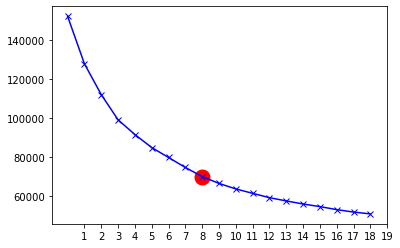

In [26]:
plt.plot(error,"bx-")
plt.scatter(8,error[8],linewidths=10,c="r")
plt.xticks(range(1,20))
plt.show()

In [27]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(data_scaled)

KMeans()

In [28]:
kmeans.labels_

array([1, 5, 3, ..., 7, 7, 7])

In [30]:
kmeans.labels_.shape

(8950,)

In [34]:
data_cluster = pd.concat([data,pd.DataFrame({"cluster":kmeans.labels_})],axis=1)
data_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,5
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


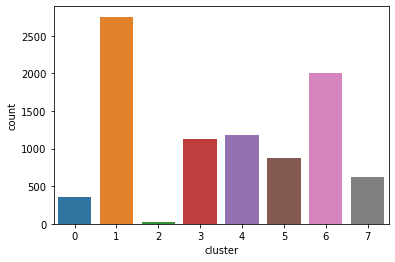

In [36]:
sns.countplot("cluster",data=data_cluster)

### PCA 
PCA kendi başına çok geniş bir konu ancak kısaca değinecek olursak verilerin arasındaki bulunan korelasyondan yararlanarak boyut düşürme işlemi yapmamıza olanak sağlar. Bir biriyle ilişkili olan verileri kapsayan yeni componentler oluştururuz. Bunları kullanarak veriyi temsil etmeye çalırız. Biz burada PCA'i veriyi 2 boyutlu olarak görselleştirme için kullanacağız. 

In [54]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_scaled)

In [55]:
pca_data

array([[-1.68222012, -1.07645265],
       [-1.1382944 ,  2.50645932],
       [ 0.96968217, -0.38351189],
       ...,
       [-0.92620316, -1.81078123],
       [-2.33655208, -0.65796071],
       [-0.55642409, -0.40046039]])

In [56]:
pca_data = pd.DataFrame(data=pca_data,columns=["pca1","pca2"])
pca_data.head()

,pca1,pca2
0,-1.682220,-1.076453
1,-1.138294,2.506459
2,0.969682,-0.383512
3,-0.873628,0.043159
4,-1.599433,-0.688580


In [57]:
pca_data = pd.concat([pca_data,pd.DataFrame({"cluster":kmeans.labels_})],axis=1)

In [58]:
pca_data.shape

(8950, 3)

In [59]:
pca_data.head()

,pca1,pca2,cluster
0,-1.682220,-1.076453,1
1,-1.138294,2.506459,5
2,0.969682,-0.383512,3
3,-0.873628,0.043159,1
4,-1.599433,-0.688580,1


Aşağıda görüldüğü gibi 2 componentlede olsa veriyi 8 farklı kümeye ayırdık. Her bir kümeyi ayrıntılı incelersek benzer özelliklere sahip olduklarını görebiliriz. 

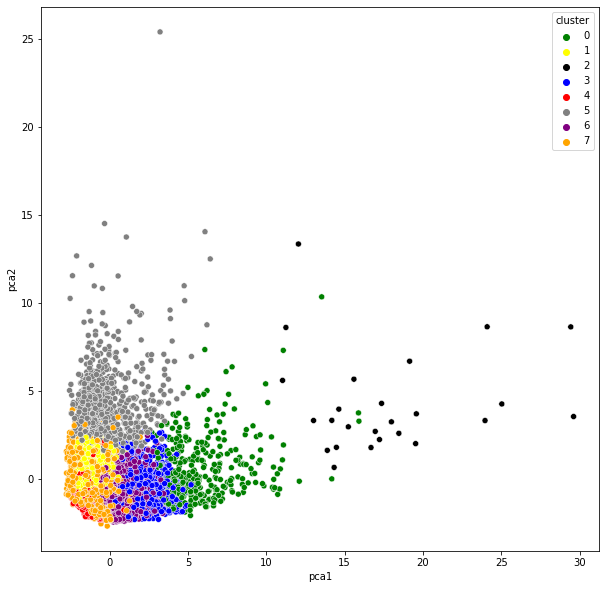

In [65]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_data,palette=["green","yellow","black","blue","red","gray","purple","orange"])
plt.show()